In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
def tanh_related(hidden):
    return 2**hidden

def perm_related(hidden):
    return math.factorial(hidden)

def per_layer(hidden):
    return perm_related(hidden) * tanh_related(hidden)

def per_mlp(hidden_layers):
    total = 1
    for hl in hidden_layers:
        ks_layer = per_layer(hl)
        total *= ks_layer
    return total

In [3]:
print("{:e}".format(per_mlp([16])))

1.371196e+18


In [4]:
h = 128

x = np.arange(h)
y_tanh = []
y_perm = []
y = []
for element in range(h):
    y_tanh.append(tanh_related(element))
    y_perm.append(perm_related(element))
    y.append(per_mlp([element]))

y_tanh = np.array(y_tanh, dtype=np.float64)
y_perm = np.array(y_perm, dtype=np.float64)
y = np.array(y, dtype=np.float64)

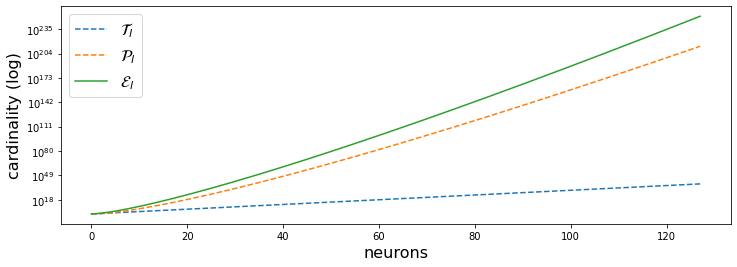

In [14]:
figure = plt.figure(figsize=(12, 4))
ax = figure.add_subplot(1, 1, 1)
ax.set_xlabel("neurons")
ax.set_ylabel("cardinality (log)")
ax.yaxis.label.set_size(16)
ax.xaxis.label.set_size(16)
ax.set_yscale("log")

#ax.plot(x, np.log(y_tanh), linestyle="dashed", label=r"$\log |\mathcal{T}_l|$")
#ax.plot(x, np.log(y_perm), linestyle="dashed", label=r"$\log |\mathcal{P}_l|$")
#ax.plot(x, np.log(y), label=r"$\log |\mathcal{E}_l|$")
ax.plot(x, (y_tanh), linestyle="dashed", label=r"$\mathcal{T}_l$")
ax.plot(x, (y_perm), linestyle="dashed", label=r"$\mathcal{P}_l$")
ax.plot(x, (y), label=r"$\mathcal{E}_l$")

ax.legend(prop={"size": 16})

In [17]:
figure.savefig("cardinality_log_scale.pdf", bbox_inches="tight", transparent=True, dpi=96)